In [4]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats

In [5]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy/analysis/adata_updated/adata.h5ad"
adata=sc.read(fpath) 

In [3]:
adata.obsm['X_umap']=adata.obsm['X_umap__n_neighbors=153,n_reduced_dims_input=29,umap_init=spectral,umap_min_dist=1pt0,umap_spread=1pt0']
sc.set_figure_params(scanpy=True, dpi=400, dpi_save=400, frameon=True, vector_friendly=True, fontsize=4, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')

In [4]:
#adata.obs['cell_type'].replace({'Mac resident IL10RA-': "Mac 1", 
#                                'Mac resident IL10RA+': "Mac 2",
#                                 'MoMac IL10RA-': "Mac intermediate 1",
#                                 'MoMac IL10RA+': "Mac intermediate 2",
#                                 'Dendritic cell': "DCs"}, inplace=True)


In [5]:
#adata.obs['cell_type'].replace({'Monocytes': "Monocytes", 
#                                'Mac resident IL10RA-': "Mac 1", 
#                                'Mac resident IL10RA+': "Mac 2",
#                                 'MoMac IL10RA-': "Mac intermediate 1",
#                                 'MoMac IL10RA+': "Mac intermediate 2"}, inplace=True)

In [38]:
df1=pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
df1.loc[:,'celltype_category']= adata.obs['celltype_category'].astype('category')
#df1.loc[:,'cell_type']= adata.obs['cell_type'].astype('category')
df1.loc[:,'celltype_label']= adata.obs['celltype_label']
#palette=plt.rcParams['axes.prop_cycle']
df1.loc[:,'SLCO2A1_log1p_cp10k']=np.array(adata[:,adata.var['gene_symbols'].isin(['SLCO2A1'])].layers['log1p_cp10k'].todense())
df1

,UMAP1,UMAP2,celltype_category,celltype_label,SLCO2A1_log1p_cp10k
CAGTGCGTCAGAGCAG-1-5892STDY8039553,11.450295,-6.446522,Stem cells,Stem cell MKI67+ (1),0.0
GGGTTTAAGACGAGCT-1-5892STDY8039553,11.133955,-9.013494,Stem cells,Stem cell MKI67+ (1),0.0
CATTCTACACTACCGG-1-5892STDY8039553,14.009640,-0.564600,Stem cells,Stem cell MKI67+ (2),0.0
CCTCCTCCATAGGTTC-1-5892STDY8039553,10.848400,-7.051911,Stem cells,Stem cell MKI67+ (1),0.0
GATGATCCACCCTTAC-1-5892STDY8039553,13.810653,-3.538153,Stem cells,Stem cell MKI67+ (2),0.0
...,...,...,...,...,...
CATTTCATCGTTCATT-1-OTARscRNA9342936,10.959710,12.339205,B Cell,B cell,0.0
GAGTTACCACTAACCA-1-OTARscRNA9342936,-2.086140,0.662185,T Cell,T cell CD8+ GZMK+,0.0
ACGGAAGCACTCAAGT-1-OTARscRNA9342936,-2.343098,2.256670,T Cell,T cell CD8+ GZMK+,0.0
AGACTCACAAGAGATT-1-OTARscRNA9342936,-1.341134,5.566211,T Cell,T cell CD4 naive,0.0


In [39]:
df1.to_csv("/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/figures/data/umap_gene.csv", index=False)

In [8]:
fpath3="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/auto-annot-121/adata/anderson_ti_freeze003_001-MT_100-cohort_Full.h5ad"
adata3=sc.read(fpath3, cache=False) 

In [14]:
adata_sub=adata[adata.obs['celltype_category'].isin(["Stem cells", "Enterocyte", "Secretory", "Mesenchymal"])]

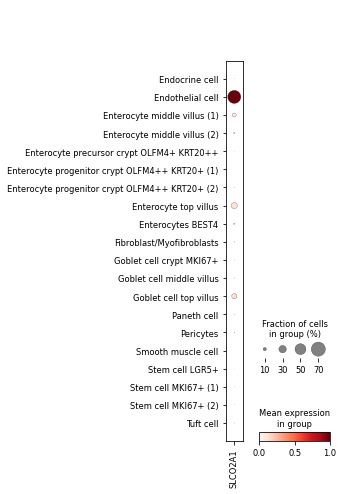

In [16]:
celltype_genes=['SLCO2A1']
sc.pl.dotplot(adata_sub, celltype_genes, groupby='celltype_label',
                  gene_symbols='gene_symbols', 
              dendrogram=False,
                  standard_scale='var',
             save="CD2_CD58_expression.png")